In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
import os.path


import seaborn as sns
from scipy import stats


# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.pyplot import *
import imageio
from skimage.io import imread

from tqdm import tqdm

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
#from natsort import natsorted
sns.set()

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn Liraries
import sklearn
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline


import sklearn
from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
print(sklearn.__version__)

1.2.1


In [3]:
#!conda install -c conda-forge scikit-learn=0.23.2
#!pip install --pre pycaret

In [4]:
#set directory for csv files
dir_name = r'C:\Users\vasan\OneDrive\EmissionsDatathon\Zeroing Methane Emissions - Dataset'
filename_suffix = 'xls'

In [5]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_excel("dfeat3all.xlsx", thousands=',', skiprows = skiprows)
dfeat3all = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df.head()

,Unnamed: 0,pic_val,Name,source_id,source_lat,source_lon,source_type_y,ipcc,number_overflights,source_persistence,...,qsource,sigma_qsource,Filepath,candidate_id,plume_lat,plume_lon,date,qplume,sigma_qplume,Uncern
0,0,114.139838,ang20190922t192642-2_r4578_c217-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,...,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190922t192642-2,32.212063,-103.697076,2019-09-22,2579.528100,902.732655,133.151448
1,1,125.558812,ang20190923t163307-G_r4113_c198-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,...,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190923t163307-G,32.212117,-103.697086,2019-09-23,934.430300,276.716131,736.942230
2,2,106.232057,ang20190926t223557-D_r4139_c225-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,...,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190926t223557-D,32.212162,-103.696830,2019-09-26,443.098484,152.257940,110.191596
3,3,155.931577,ang20191006t150453-6_r4168_c237-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,...,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20191006t150453-6,32.212327,-103.697526,2019-10-06,1032.395030,606.623335,244.327697
4,4,138.265995,ang20191007t182352-2_r4062_c150-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,...,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20191007t182352-2,32.212253,-103.697253,2019-10-07,826.823256,226.851094,135.781536


In [6]:
df.shape

(6062, 21)

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.head()

,pic_val,Name,source_id,source_lat,source_lon,source_type_y,ipcc,number_overflights,source_persistence,confidence_in_persistence,qsource,sigma_qsource,Filepath,candidate_id,plume_lat,plume_lon,date,qplume,sigma_qplume,Uncern
0,114.139838,ang20190922t192642-2_r4578_c217-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190922t192642-2,32.212063,-103.697076,2019-09-22,2579.528100,902.732655,133.151448
1,125.558812,ang20190923t163307-G_r4113_c198-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190923t163307-G,32.212117,-103.697086,2019-09-23,934.430300,276.716131,736.942230
2,106.232057,ang20190926t223557-D_r4139_c225-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20190926t223557-D,32.212162,-103.696830,2019-09-26,443.098484,152.257940,110.191596
3,155.931577,ang20191006t150453-6_r4168_c237-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20191006t150453-6,32.212327,-103.697526,2019-10-06,1032.395030,606.623335,244.327697
4,138.265995,ang20191007t182352-2_r4062_c150-plume.png,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.48423,307.380288,C:\Users\vasan\OneDrive\EmissionsDatathon\Data...,ang20191007t182352-2,32.212253,-103.697253,2019-10-07,826.823256,226.851094,135.781536


In [9]:
df.describe()

,pic_val,source_lat,source_lon,number_overflights,source_persistence,qsource,sigma_qsource,plume_lat,plume_lon,qplume,sigma_qplume,Uncern
count,6060.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,6062.000000,5990.000000
mean,137.107947,33.062778,-104.179228,5.185087,0.551059,305.836566,100.361834,33.062778,-104.179227,559.042147,183.240800,71.067197
std,30.832193,2.430492,7.096847,3.336843,0.315326,467.552992,155.206428,2.430492,7.096847,797.892685,269.671393,166.995204
min,1.352941,25.857711,-122.412006,1.000000,0.071429,2.697304,0.625286,25.857300,-122.412006,8.091911,4.246207,0.450500
25%,124.887491,31.822890,-104.097143,3.000000,0.285714,74.051119,24.749421,31.822863,-104.097101,166.331086,54.947155,22.537497
50%,147.909387,32.066110,-103.737620,4.000000,0.500000,159.948436,54.200015,32.066123,-103.737790,307.209799,103.020765,36.563889
75%,157.018026,32.558432,-103.032393,9.000000,0.857143,325.974110,110.156066,32.558554,-103.032501,615.901103,202.875586,59.994311
max,196.021947,42.281528,-75.581762,14.000000,1.000000,5316.639288,2168.145498,42.281596,-75.581762,16811.280200,8519.241420,5363.490487


In [10]:
df['measure'] = df['candidate_id'].str.slice(stop=3)

In [13]:
df['measure'].nunique()

2

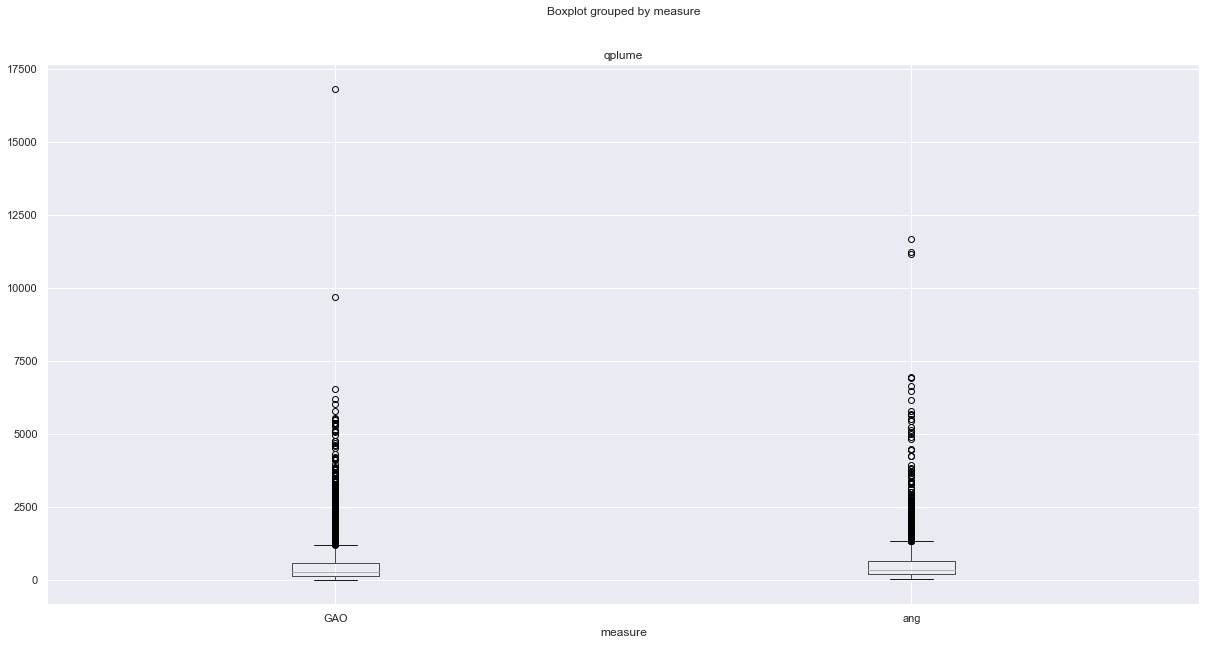

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
bxplot = df.boxplot(column='qplume', by='measure', ax=ax)
#ax.set_ylim(0, 1250)  # Set the y-axis limits
plt.show()

In [17]:
df = df.drop(['source_lat', 'source_lon', 'number_overflights', 'qsource', 'sigma_qsource','plume_lat', 'plume_lon', 'sigma_qplume', 'Uncern'], axis=1)

In [18]:
df = df.drop(['Name', 'source_id', 'source_type_y', 'ipcc', 'source_persistence','confidence_in_persistence', 'Filepath', 'candidate_id', 'date'], axis=1)

In [30]:
df = df.drop(['measure'], axis=1)

In [31]:
df.head()

,pic_val,qplume
0,114.139838,2579.528100
1,125.558812,934.430300
2,106.232057,443.098484
3,155.931577,1032.395030
4,138.265995,826.823256


In [32]:
df.shape

(6062, 2)

In [33]:
dfdrop = df.loc[df['qplume'] < 1250]

In [34]:
dfdrop.shape

(5471, 2)

In [39]:
dfdrop = dfdrop.astype(float)

In [41]:
np.isnan(dfdrop).any()

pic_val     True
qplume     False
dtype: bool

In [42]:
dfdrop.isna().sum()

pic_val    2
qplume     0
dtype: int64

In [43]:
dfdrop = dfdrop.dropna()

In [44]:
dfdrop.shape

(5469, 2)

In [45]:
print("Upper limit",dfdrop['qplume'].mean() + 3*dfdrop['qplume'].std())
print("Lower limit",dfdrop['qplume'].mean() - 3*dfdrop['qplume'].std())

Upper limit 1186.2017836318653
Lower limit -466.2734423214394


In [46]:
dfdrop = dfdrop[(dfdrop['qplume'] < 1186.0882000125907)]
dfdrop.shape

(5412, 2)

In [47]:
# Creates a mask where values that are true go into the training/test set
# Note that I done it so that the random number is predictable

msk = np.random.seed(0)
msk = np.random.rand(len(df))<0.8

raw_train_validate_set = df[msk]
raw_test_set = df[~msk]

print(raw_train_validate_set.shape)
print(raw_test_set.shape)

(4860, 2)
(1200, 2)


In [39]:
raw_train_validate_set.to_excel(r'dftrain.xlsx', index = False, header=True)
raw_test_set.to_excel(r'dftest.xlsx', index = False, header=True)

In [40]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
dftrain = pd.read_excel("dftrain.xlsx", thousands=',', skiprows = skiprows)
dftrain = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
dftrain.head()

,pic_val,qplume
0,114.139838,2579.528100
1,125.558812,934.430300
2,106.232057,443.098484
3,155.931577,1032.395030
4,138.265995,826.823256


In [41]:
target_columns = [
    "qplume"
]

y_train = dftrain[target_columns]
X_train = dftrain.drop(columns=target_columns)

In [42]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_predtrain = model_lr.predict(X_train)

In [44]:
print('Coefficients:', model_lr.coef_)
print('Intercept:', model_lr.intercept_)

Coefficients: [[-0.82009959]]
Intercept: [592.46424785]


In [45]:
# Calculate the mean squared error
mse = mean_squared_error(y_train, y_predtrain)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_train, y_predtrain)
print("Test R^2 Score: {:.5f}".format(r2))

Root Mean Squared Error: 501.358863095747
Test R^2 Score: 0.00250


In [46]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
dftest = pd.read_excel("dftest.xlsx", thousands=',', skiprows = skiprows)
dftest = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
dftest.head()

,pic_val,qplume
0,114.139838,2579.528100
1,125.558812,934.430300
2,106.232057,443.098484
3,155.931577,1032.395030
4,138.265995,826.823256


In [47]:
y_test = dftest[target_columns]
X_test = dftest.drop(columns=target_columns)

In [48]:
y_predtest = model_lr.predict(X_test)

In [49]:
# Calculate the mean squared error
mse = mean_squared_error(y_train, y_predtest)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_train, y_predtest)
print("Test R^2 Score: {:.5f}".format(r2))

Root Mean Squared Error: 501.358863095747
Test R^2 Score: 0.00250


In [50]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
dsub = pd.read_excel("dsub.xlsx", thousands=',', skiprows = skiprows)
dsub = dsub.loc[:, ~dsub.columns.str.contains('^Unnamed')] 
dsub.head()

,pic_val,Name
0,126.834570,01A.png
1,134.068051,02A.png
2,139.087957,03A.png
3,136.115646,04A.png
4,134.872976,05A.png


In [60]:
dsub

,pic_val
0,126.834570
1,134.068051
2,139.087957
3,136.115646
4,134.872976
5,136.441601
6,129.841780
7,135.147339
8,132.081186
9,128.553614


In [54]:
dsub = dsub.drop('Name', axis=1)

In [55]:
dsub.shape

(20, 1)

In [56]:
y_predsub = model_lr.predict(dsub)

In [57]:
y_predsub

array([[488.4472691 ],
       [482.5150936 ],
       [478.39827137],
       [480.83586195],
       [481.85497567],
       [480.56854648],
       [485.98105712],
       [481.62997039],
       [484.14452124],
       [487.03748172],
       [502.9398508 ],
       [488.25631585],
       [536.13583166],
       [478.93171064],
       [494.5629331 ],
       [540.8959828 ],
       [485.52928019],
       [501.95351823],
       [504.64524992],
       [531.28002942]])

In [58]:
np.savetxt('15.csv', y_predsub, delimiter=',')